In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Population Distribution and Parameter

In [2]:
files = ['num.csv', 'percent.csv', 'sub-qhp-num.csv', 'sub-qhp-per.csv', 'qhp400-num.csv', 'qhp400-per.csv', 'income-num.csv', 'income-per.csv']
tables = []
for file_name in files:
    file_path = 'csvFiles/' + file_name
    tables.append(Table.read_table(file_path))
for index in range(len(tables)-1):
    tbl = tables[index]
    column_nums = tbl.num_columns
    tables[index] = tbl.drop(np.arange(column_nums-10, column_nums, 1)).drop('FIPS Code')
tables[0]

C:\Users\PeterWi.UNC-R90YENLK\anaconda3\lib\site-packages\datascience\tables.py:1252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i not in exclude and c not in exclude])


State Name,County Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,Age 0-18,Age 19-34,Age 35-49,Age 50-64,Male,Female,Married,Child in Family,Spanish/Hispanic/Latino Origin,White Non-Latino,Black Non-Latino,Asian / Native-Hawaiian / Pac Islander,American Indian / Alaska Native,Multi-racial or Other,SNAP Recipient,With a disability,Full-time Worker in Family,Employed in Agriculture Industry,Employed in Mining/Construction Industry,Employed in Manufacturing Industry,Employed in Trade Industry,Employed in Info/Finance Industry,Employed in Education/Health Industry,Employed in Entertainment Industry,Employed in Service Industry,Employed in Military/Public Industry,Less than High School,High School Diploma
Alabama,Autauga AL,"46,000","4,300",9%,"2,300",700,600,500,300,200,"1,600","1,500","1,100","2,800","1,600","1,300","1,200",200,"2,500","1,600",**,**,0,700,900,"2,600",**,300,400,600,300,300,500,100,100,"1,000","3,000"
Alabama,Baldwin AL,"171,200","15,600",9%,"7,000","1,800","2,400","2,200","2,100","1,000","6,100","4,000","4,500","7,300","8,300","3,900","3,700","1,100","12,700","1,600",**,**,**,"3,500",800,"12,000",300,"2,500",700,"3,400","2,200","1,600","1,500",**,**,"2,500","10,600"
Alabama,Barbour AL,"22,100","2,700",12%,"1,200",300,500,600,100,100,"1,300",800,400,"1,300","1,400",400,"1,000",300,900,"1,500",**,**,**,800,100,"2,100",100,200,200,300,300,300,500,200,**,500,"2,000"
Alabama,Bibb AL,"16,800","2,700",16%,"1,400",400,300,300,300,100,"1,500",700,400,"1,300","1,400",700,900,0,"1,000","1,700",**,**,**,"1,000",300,"1,700",**,100,300,300,200,200,600,200,100,500,"2,000"
Alabama,Blount AL,"49,500","6,400",13%,"3,500",600,700,900,600,500,"2,600","2,300","1,000","3,800","2,600","1,500","1,700",800,"4,300","1,100",**,**,**,"2,000",900,"3,700",**,"1,000",600,600,400,700,200,400,200,"1,600","4,500"
Alabama,Bullock AL,"8,800","1,100",12%,500,100,200,200,0,0,500,300,200,500,600,200,400,100,400,600,**,**,**,300,0,800,0,100,100,100,100,100,200,100,**,200,800
Alabama,Butler AL,"16,600","2,400",14%,"1,100",200,700,200,200,200,"1,100",500,600,"1,200","1,200",400,700,100,"1,500",800,**,**,**,800,300,"1,700",0,200,300,300,300,100,300,100,0,600,"1,800"
Alabama,Calhoun AL,"91,900","11,300",12%,"5,700","1,800","2,300","1,100",500,200,"4,100","4,300","2,700","6,700","4,700","3,600","3,500",300,"6,700","3,500",**,**,**,"3,700","2,000","8,600",**,"1,200","1,800","2,400","1,000",600,"1,300",300,**,"2,500","8,200"
Alabama,Chambers AL,"26,200","3,200",12%,"1,300",100,700,500,600,100,"1,400",800,900,"2,000","1,200","1,200",600,200,"2,100",900,**,**,**,800,600,"2,200",100,300,800,500,300,200,200,100,100,800,"2,400"
Alabama,Cherokee AL,"20,600","3,100",15%,"1,800",100,600,200,300,200,"1,200","1,000",700,"1,900","1,200",600,800,100,"2,000",900,**,**,0,700,700,"2,200",**,400,400,600,300,300,400,0,200,800,"2,200"


In [18]:
def str_to_int(str) :
    if (str == "**"):
        return 0
    if "%" in str :
        return remove_percent(str)
    return int(str.replace(',', ''))

def remove_percent(str) :
    return int(str.replace('%', ''))

In [23]:
column_names = tables[0].labels # we get column
unpop = tables[0]
for col in column_names:
    if (col == "State Name") or (col == "County Name"):
        continue
    unpop = unpop.with_columns(
    col, tables[0].apply(str_to_int, col),
)
unpop

State Name,County Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,Age 0-18,Age 19-34,Age 35-49,Age 50-64,Male,Female,Married,Child in Family,Spanish/Hispanic/Latino Origin,White Non-Latino,Black Non-Latino,Asian / Native-Hawaiian / Pac Islander,American Indian / Alaska Native,Multi-racial or Other,SNAP Recipient,With a disability,Full-time Worker in Family,Employed in Agriculture Industry,Employed in Mining/Construction Industry,Employed in Manufacturing Industry,Employed in Trade Industry,Employed in Info/Finance Industry,Employed in Education/Health Industry,Employed in Entertainment Industry,Employed in Service Industry,Employed in Military/Public Industry,Less than High School,High School Diploma
Alabama,Autauga AL,46000,4300,9,2300,700,600,500,300,200,1600,1500,1100,2800,1600,1300,1200,200,2500,1600,0,0,0,700,900,2600,0,300,400,600,300,300,500,100,100,1000,3000
Alabama,Baldwin AL,171200,15600,9,7000,1800,2400,2200,2100,1000,6100,4000,4500,7300,8300,3900,3700,1100,12700,1600,0,0,0,3500,800,12000,300,2500,700,3400,2200,1600,1500,0,0,2500,10600
Alabama,Barbour AL,22100,2700,12,1200,300,500,600,100,100,1300,800,400,1300,1400,400,1000,300,900,1500,0,0,0,800,100,2100,100,200,200,300,300,300,500,200,0,500,2000
Alabama,Bibb AL,16800,2700,16,1400,400,300,300,300,100,1500,700,400,1300,1400,700,900,0,1000,1700,0,0,0,1000,300,1700,0,100,300,300,200,200,600,200,100,500,2000
Alabama,Blount AL,49500,6400,13,3500,600,700,900,600,500,2600,2300,1000,3800,2600,1500,1700,800,4300,1100,0,0,0,2000,900,3700,0,1000,600,600,400,700,200,400,200,1600,4500
Alabama,Bullock AL,8800,1100,12,500,100,200,200,0,0,500,300,200,500,600,200,400,100,400,600,0,0,0,300,0,800,0,100,100,100,100,100,200,100,0,200,800
Alabama,Butler AL,16600,2400,14,1100,200,700,200,200,200,1100,500,600,1200,1200,400,700,100,1500,800,0,0,0,800,300,1700,0,200,300,300,300,100,300,100,0,600,1800
Alabama,Calhoun AL,91900,11300,12,5700,1800,2300,1100,500,200,4100,4300,2700,6700,4700,3600,3500,300,6700,3500,0,0,0,3700,2000,8600,0,1200,1800,2400,1000,600,1300,300,0,2500,8200
Alabama,Chambers AL,26200,3200,12,1300,100,700,500,600,100,1400,800,900,2000,1200,1200,600,200,2100,900,0,0,0,800,600,2200,100,300,800,500,300,200,200,100,100,800,2400
Alabama,Cherokee AL,20600,3100,15,1800,100,600,200,300,200,1200,1000,700,1900,1200,600,800,100,2000,900,0,0,0,700,700,2200,0,400,400,600,300,300,400,0,200,800,2200


In [58]:
unpop

State Name,County Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,Age 0-18,Age 19-34,Age 35-49,Age 50-64,Male,Female,Married,Child in Family,Spanish/Hispanic/Latino Origin,White Non-Latino,Black Non-Latino,Asian / Native-Hawaiian / Pac Islander,American Indian / Alaska Native,Multi-racial or Other,SNAP Recipient,With a disability,Full-time Worker in Family,Employed in Agriculture Industry,Employed in Mining/Construction Industry,Employed in Manufacturing Industry,Employed in Trade Industry,Employed in Info/Finance Industry,Employed in Education/Health Industry,Employed in Entertainment Industry,Employed in Service Industry,Employed in Military/Public Industry,Less than High School,High School Diploma
Alabama,Autauga AL,46000,4300,9,2300,700,600,500,300,200,1600,1500,1100,2800,1600,1300,1200,200,2500,1600,0,0,0,700,900,2600,0,300,400,600,300,300,500,100,100,1000,3000
Alabama,Baldwin AL,171200,15600,9,7000,1800,2400,2200,2100,1000,6100,4000,4500,7300,8300,3900,3700,1100,12700,1600,0,0,0,3500,800,12000,300,2500,700,3400,2200,1600,1500,0,0,2500,10600
Alabama,Barbour AL,22100,2700,12,1200,300,500,600,100,100,1300,800,400,1300,1400,400,1000,300,900,1500,0,0,0,800,100,2100,100,200,200,300,300,300,500,200,0,500,2000
Alabama,Bibb AL,16800,2700,16,1400,400,300,300,300,100,1500,700,400,1300,1400,700,900,0,1000,1700,0,0,0,1000,300,1700,0,100,300,300,200,200,600,200,100,500,2000
Alabama,Blount AL,49500,6400,13,3500,600,700,900,600,500,2600,2300,1000,3800,2600,1500,1700,800,4300,1100,0,0,0,2000,900,3700,0,1000,600,600,400,700,200,400,200,1600,4500
Alabama,Bullock AL,8800,1100,12,500,100,200,200,0,0,500,300,200,500,600,200,400,100,400,600,0,0,0,300,0,800,0,100,100,100,100,100,200,100,0,200,800
Alabama,Butler AL,16600,2400,14,1100,200,700,200,200,200,1100,500,600,1200,1200,400,700,100,1500,800,0,0,0,800,300,1700,0,200,300,300,300,100,300,100,0,600,1800
Alabama,Calhoun AL,91900,11300,12,5700,1800,2300,1100,500,200,4100,4300,2700,6700,4700,3600,3500,300,6700,3500,0,0,0,3700,2000,8600,0,1200,1800,2400,1000,600,1300,300,0,2500,8200
Alabama,Chambers AL,26200,3200,12,1300,100,700,500,600,100,1400,800,900,2000,1200,1200,600,200,2100,900,0,0,0,800,600,2200,100,300,800,500,300,200,200,100,100,800,2400
Alabama,Cherokee AL,20600,3100,15,1800,100,600,200,300,200,1200,1000,700,1900,1200,600,800,100,2000,900,0,0,0,700,700,2200,0,400,400,600,300,300,400,0,200,800,2200


In [56]:
highest_total = unpop.sort("Uninsured Population (Excluding Undocumented)", descending = True).take(np.arange(100)).sort("Percent Uninsured", descending = True)
highest_total

State Name,County Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,Age 0-18,Age 19-34,Age 35-49,Age 50-64,Male,Female,Married,Child in Family,Spanish/Hispanic/Latino Origin,White Non-Latino,Black Non-Latino,Asian / Native-Hawaiian / Pac Islander,American Indian / Alaska Native,Multi-racial or Other,SNAP Recipient,With a disability,Full-time Worker in Family,Employed in Agriculture Industry,Employed in Mining/Construction Industry,Employed in Manufacturing Industry,Employed in Trade Industry,Employed in Info/Finance Industry,Employed in Education/Health Industry,Employed in Entertainment Industry,Employed in Service Industry,Employed in Military/Public Industry,Less than High School,High School Diploma
Texas,Hidalgo TX,692100,219700,32,97300,30000,48500,22400,21500,47900,91000,52500,28300,111600,108200,75900,122000,210800,5500,1400,1200,200,500,59500,11500,179000,3600,17700,10300,32200,19700,27500,19700,10900,3700,53100,142500
Texas,Cameron TX,335700,99500,30,39100,17100,19500,14300,9400,20900,38400,23200,16900,50000,49600,37800,54200,93100,4900,700,400,0,300,25500,4300,82600,700,8400,4600,12000,8800,15600,9300,3000,600,24600,65500
Texas,Webb TX,227700,64700,29,22100,9700,15800,11500,5500,15100,25500,15600,8500,29600,35100,20700,40000,63700,600,400,0,0,0,18900,7400,54300,600,2900,1100,15700,5300,5400,5100,2100,1200,20100,36400
Texas,Jefferson TX,205600,53400,26,22200,5800,14700,5800,4800,7800,20100,15400,10200,33600,19700,14100,19000,20500,12300,17800,2500,200,0,6900,7800,37600,300,10400,3500,7600,3400,3600,5100,1700,400,14600,34800
Texas,El Paso TX,699000,157100,23,63400,17200,42000,22000,12400,27800,66000,37100,26300,78600,78500,42900,72000,140800,10200,3600,1300,700,400,44600,10400,128000,400,13300,8700,23700,16400,19300,15200,6600,4100,24300,110600
Texas,Harris TX,3859700,804500,21,255400,90800,217400,145100,95900,166900,303700,209500,124300,426300,378200,238000,390100,485000,122900,150900,32400,2200,11100,133700,51300,673500,1400,93200,37900,113900,88600,69400,83500,38800,13800,183000,515300
Texas,Dallas TX,2118600,453600,21,130800,59200,148500,68200,47000,106400,168900,109200,69200,247400,206200,126400,223200,257700,73900,96800,17600,1800,5800,61600,30600,380700,400,54400,17700,60300,55000,32300,48700,24200,6300,100500,296800
Georgia,Clayton GA,250600,50600,20,21300,7100,11600,7200,3500,10800,23500,10500,5800,26400,24200,8900,21500,7000,5600,35600,1200,0,1200,11700,2900,40400,0,3800,2100,9400,6200,4600,4000,1900,900,8500,36700
Texas,Brazoria TX,320700,56500,19,25200,1300,7800,14000,8200,10500,20800,13900,11300,34200,22300,18300,22300,23400,22300,7300,2800,0,0,8000,3900,40100,600,6500,2700,5500,4700,4800,4200,1400,0,10400,40100
Texas,Nueces TX,300000,55400,19,20400,7100,15800,6400,5800,7400,23400,14900,9700,30300,25100,14800,22900,41400,9700,3600,700,0,0,15800,4400,42800,0,7800,1400,8100,4600,5500,8100,4000,1200,9700,39500


In [60]:
highest_total_in_percent.sort("Percent Uninsured", descending = True)

State Name,County Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,Age 0-18,Age 19-34,Age 35-49,Age 50-64,Male,Female,Married,Child in Family,Spanish/Hispanic/Latino Origin,White Non-Latino,Black Non-Latino,Asian / Native-Hawaiian / Pac Islander,American Indian / Alaska Native,Multi-racial or Other,SNAP Recipient,With a disability,Full-time Worker in Family,Employed in Agriculture Industry,Employed in Mining/Construction Industry,Employed in Manufacturing Industry,Employed in Trade Industry,Employed in Info/Finance Industry,Employed in Education/Health Industry,Employed in Entertainment Industry,Employed in Service Industry,Employed in Military/Public Industry,Less than High School,High School Diploma
Texas,Hidalgo TX,692100,219700,32,0.442877,0.13655,0.220756,0.101957,0.0978607,0.218025,0.414201,0.238962,0.128812,0.507965,0.49249,0.345471,0.555303,0.95949,0.0250341,0.00637233,0.00546199,0.000910332,0.00227583,0.270824,0.0523441,0.814747,0.016386,0.0805644,0.0468821,0.146563,0.0896677,0.125171,0.0896677,0.0496131,0.0168411,0.241693,0.648612
Texas,Cameron TX,335700,99500,30,0.392965,0.171859,0.19598,0.143719,0.0944724,0.21005,0.38593,0.233166,0.169849,0.502513,0.498492,0.379899,0.544724,0.935678,0.0492462,0.00703518,0.0040201,0,0.00301508,0.256281,0.0432161,0.830151,0.00703518,0.0844221,0.0462312,0.120603,0.0884422,0.156784,0.0934673,0.0301508,0.00603015,0.247236,0.658291
Texas,Webb TX,227700,64700,29,0.341577,0.149923,0.244204,0.177743,0.0850077,0.233385,0.394127,0.241113,0.131376,0.457496,0.542504,0.319938,0.618238,0.984544,0.00927357,0.00618238,0,0,0,0.292117,0.114374,0.839258,0.00927357,0.0448223,0.0170015,0.242658,0.0819165,0.0834621,0.0788253,0.0324575,0.0185471,0.310665,0.562597
Texas,Jefferson TX,205600,53400,26,0.41573,0.108614,0.275281,0.108614,0.0898876,0.146067,0.376404,0.28839,0.191011,0.629213,0.368914,0.264045,0.355805,0.383895,0.230337,0.333333,0.0468165,0.00374532,0,0.129213,0.146067,0.70412,0.00561798,0.194757,0.0655431,0.142322,0.0636704,0.0674157,0.0955056,0.0318352,0.00749064,0.273408,0.651685
Texas,El Paso TX,699000,157100,23,0.403565,0.109484,0.267346,0.140038,0.0789306,0.176957,0.420115,0.236155,0.167409,0.500318,0.499682,0.273074,0.458307,0.896244,0.0649268,0.0229153,0.00827498,0.00445576,0.00254615,0.283896,0.0661999,0.814768,0.00254615,0.0846595,0.0553787,0.150859,0.104392,0.122852,0.0967537,0.0420115,0.026098,0.154679,0.70401
Texas,Harris TX,3859700,804500,21,0.317464,0.112865,0.27023,0.18036,0.119204,0.207458,0.377502,0.26041,0.154506,0.529894,0.470106,0.295836,0.484897,0.602859,0.152766,0.18757,0.0402735,0.00273462,0.0137974,0.16619,0.0637663,0.837166,0.00174021,0.115848,0.04711,0.141579,0.110131,0.0862648,0.103791,0.0482287,0.0171535,0.22747,0.640522
Texas,Dallas TX,2118600,453600,21,0.28836,0.130511,0.327381,0.150353,0.103616,0.234568,0.372354,0.240741,0.152557,0.545414,0.454586,0.27866,0.492063,0.568122,0.162919,0.213404,0.0388007,0.00396825,0.0127866,0.135802,0.0674603,0.839286,0.000881834,0.119929,0.0390212,0.132937,0.121252,0.0712081,0.107363,0.053351,0.0138889,0.221561,0.654321
Georgia,Clayton GA,250600,50600,20,0.420949,0.140316,0.229249,0.142292,0.06917,0.213439,0.464427,0.20751,0.114625,0.521739,0.478261,0.175889,0.424901,0.13834,0.110672,0.703557,0.0237154,0,0.0237154,0.231225,0.0573123,0.798419,0,0.0750988,0.041502,0.185771,0.12253,0.0909091,0.0790514,0.0375494,0.0177866,0.167984,0.725296
Texas,Brazoria TX,320700,56500,19,0.446018,0.0230088,0.138053,0.247788,0.145133,0.185841,0.368142,0.246018,0.2,0.60531,0.39469,0.323894,0.39469,0.414159,0.39469,0.129204,0.0495575,0,0,0.141593,0.0690265,0.709735,0.0106195,0.115044,0.0477876,0.0973451,0.0831858,0.0849558,0.0743363,0.0247788,0,0.184071,0.709735
Texas,Nueces TX,300000,55400,19,0.368231,0.128159,0.285199,0.115523,0.104693,0.133574,0.422383,0.268953,0.1750

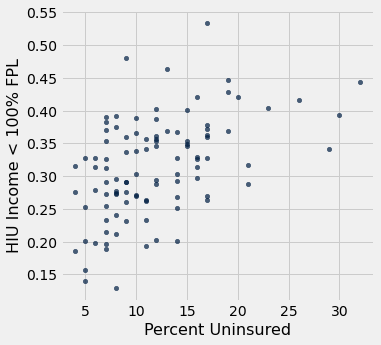

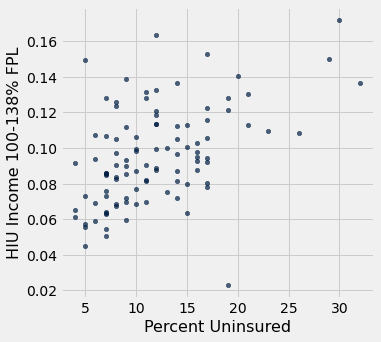

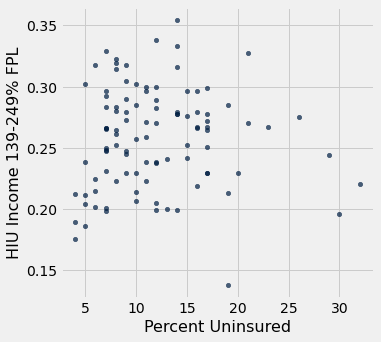

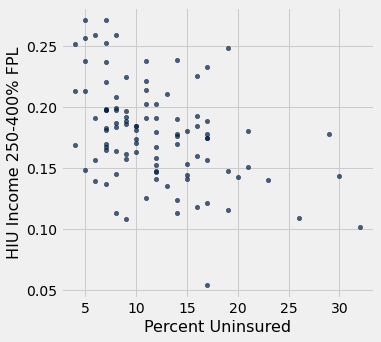

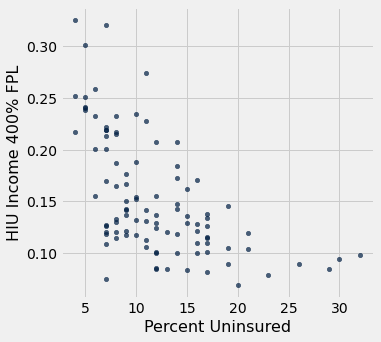

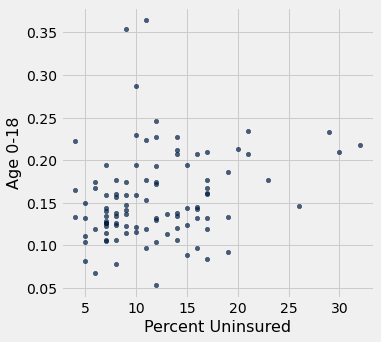

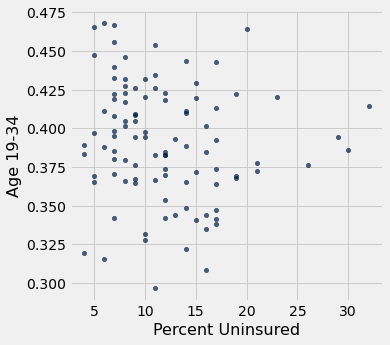

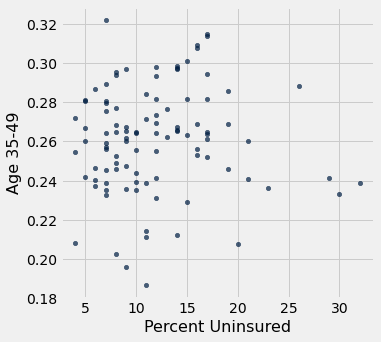

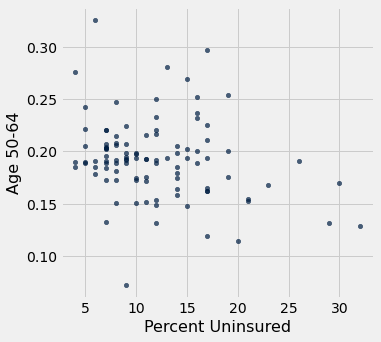

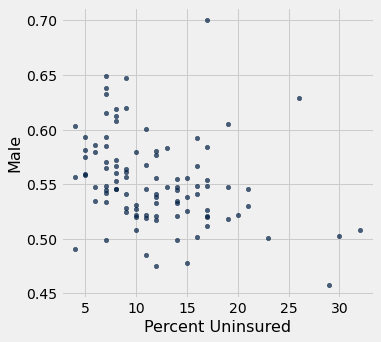

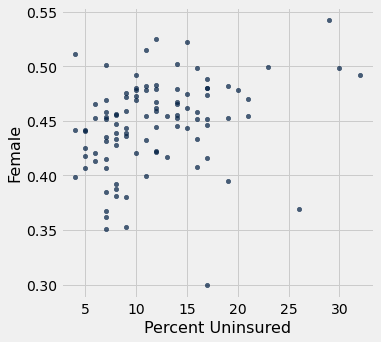

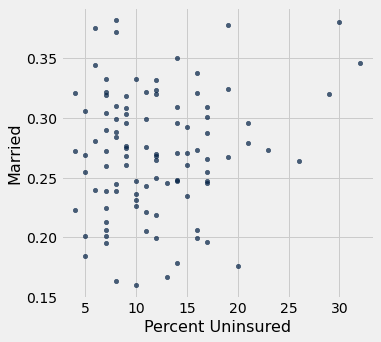

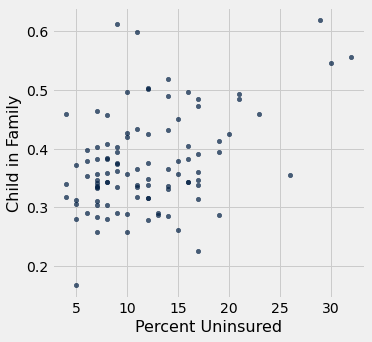

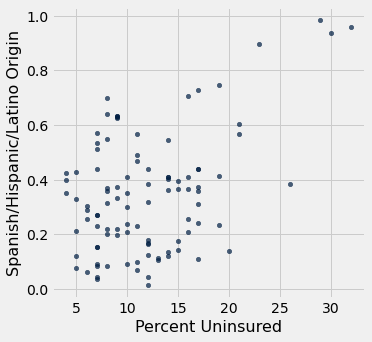

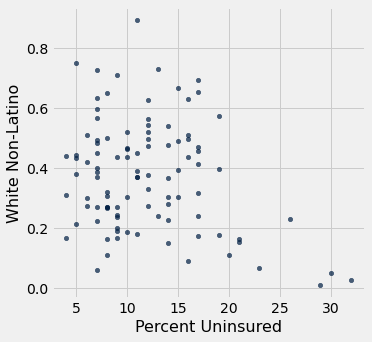

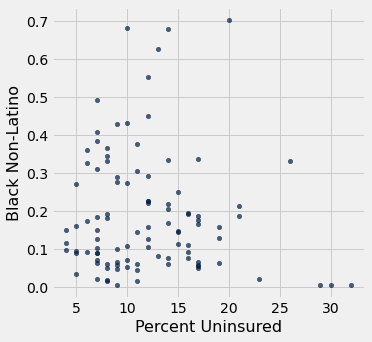

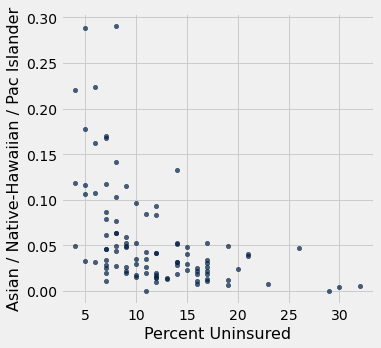

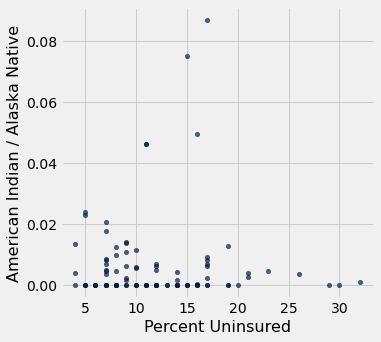

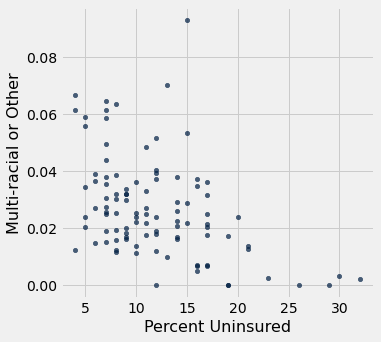

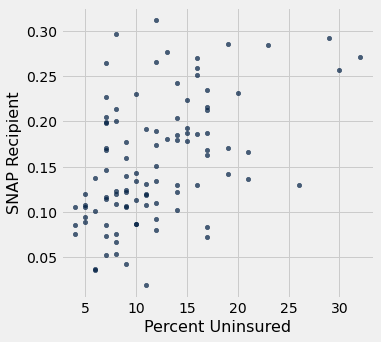

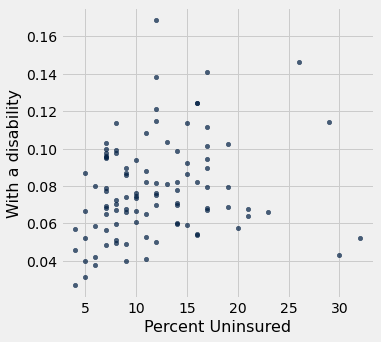

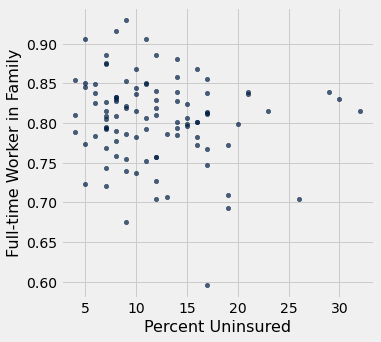

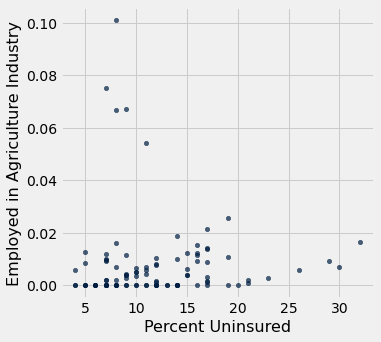

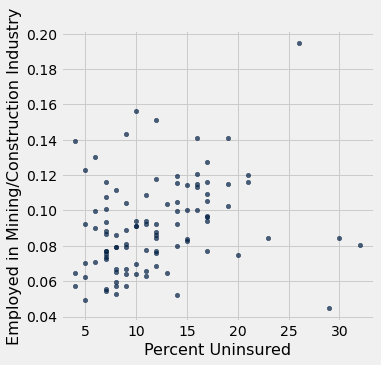

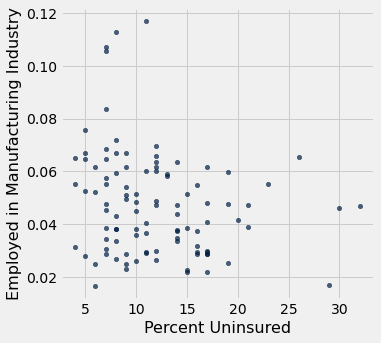

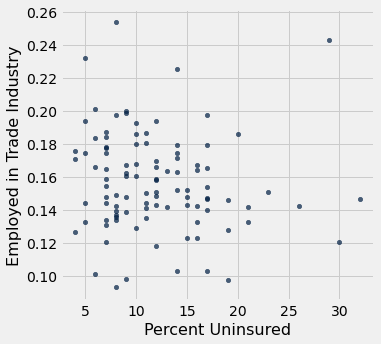

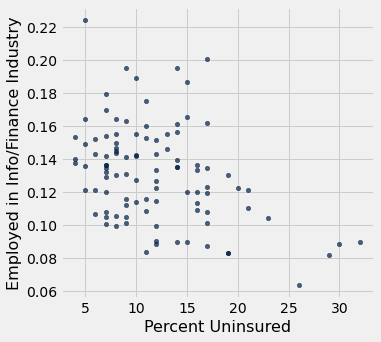

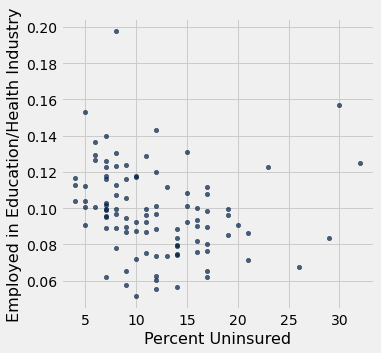

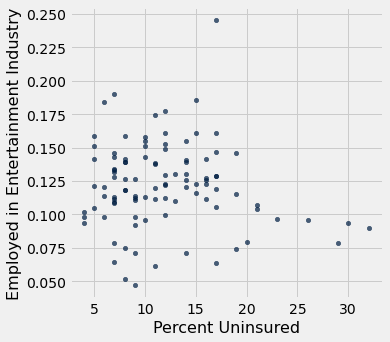

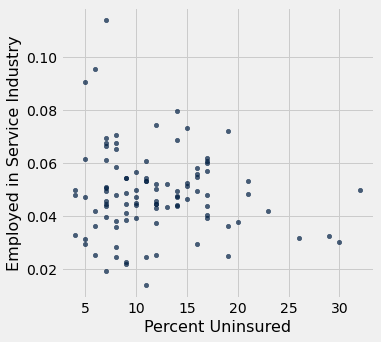

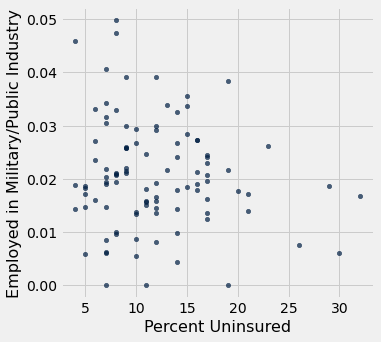

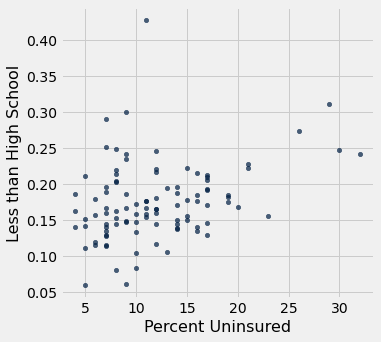

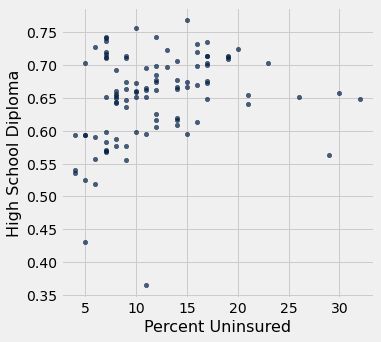

In [49]:
highest_total_in_percent = highest_total
for col in column_names:
    if (col == "State Name") or (col == "County Name") or (col == "Total Non-Elderly Population (Excluding Undocumented)") or (col == "Uninsured Population (Excluding Undocumented)" or (col == "Percent Uninsured")):
        continue
    highest_total_in_percent = highest_total_in_percent.with_column(
        col, highest_total_in_percent.column(col) / highest_total_in_percent.column("Uninsured Population (Excluding Undocumented)")
    )
    highest_total_in_percent.scatter("Percent Uninsured", col)

In [53]:
important_factors = make_array("HIU Income < 100% FPL", "HIU Income 100-138% FPL", "HIU Income 250-400% FPL", "HIU Income 400% FPL",
                                 "Spanish/Hispanic/Latino Origin", "SNAP Recipient", "With a disability", 
                                  "Employed in Mining/Construction Industry", "Employed in Info/Finance Industry",
                                 "Less than High School")

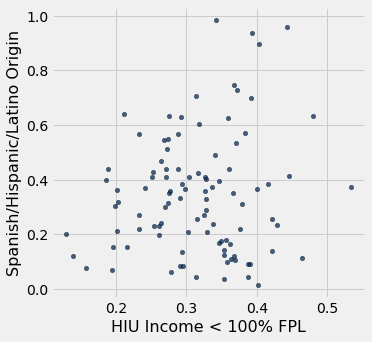

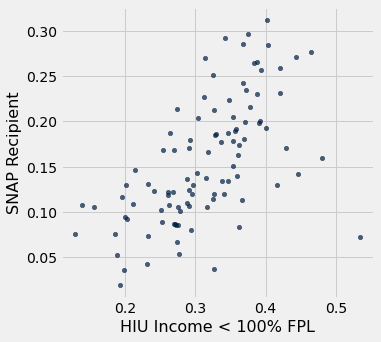

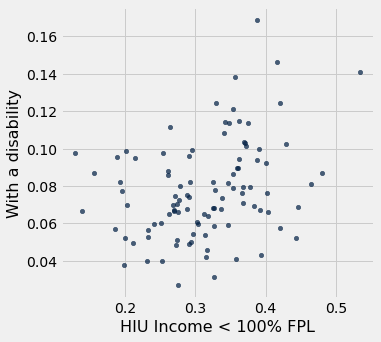

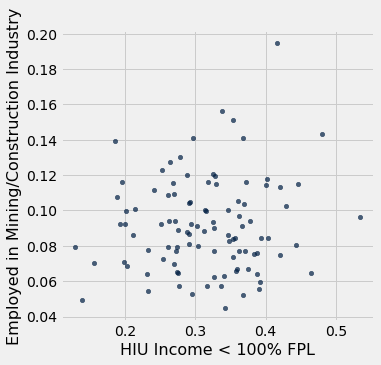

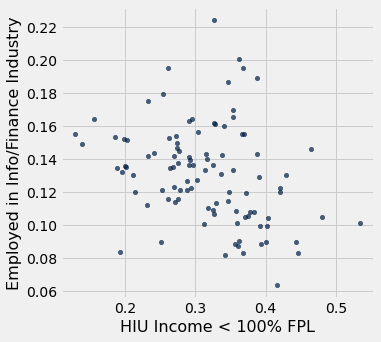

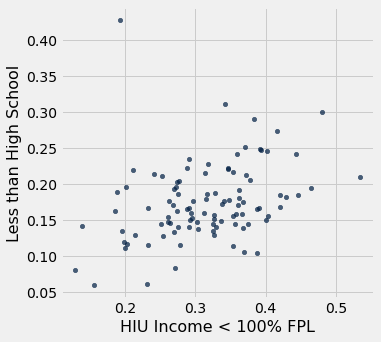

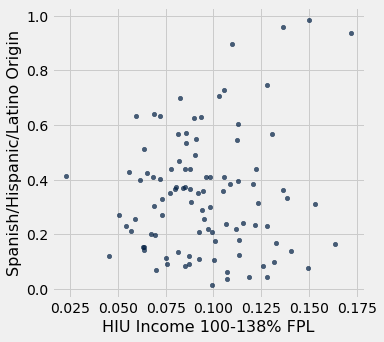

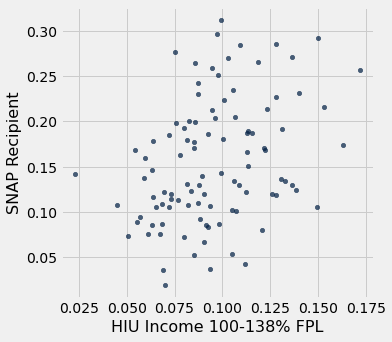

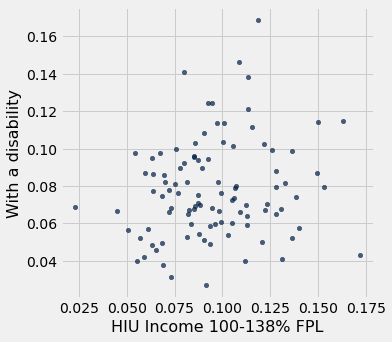

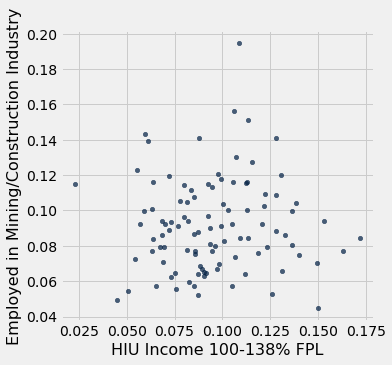

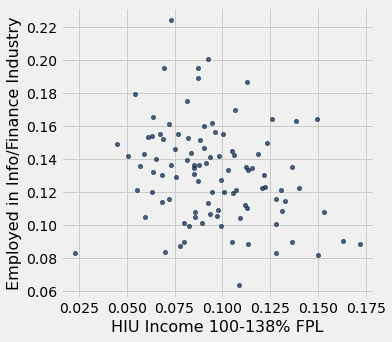

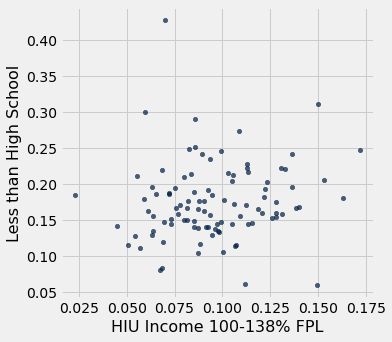

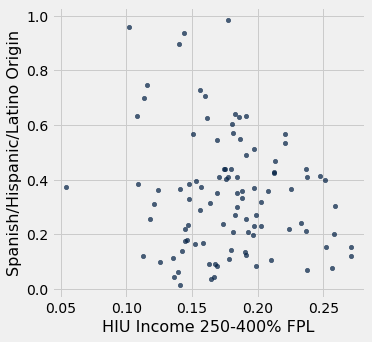

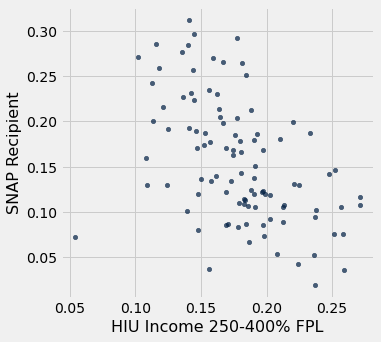

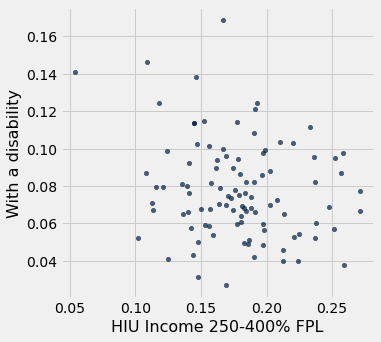

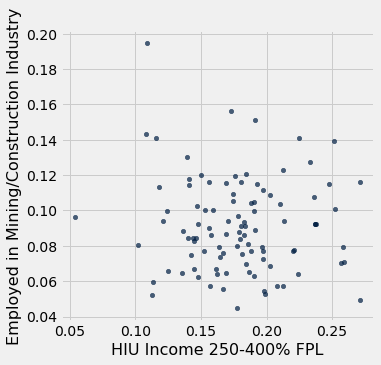

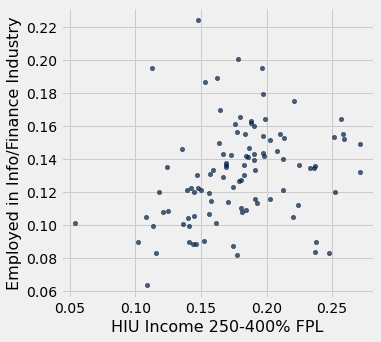

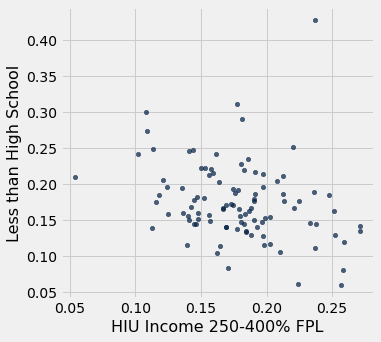

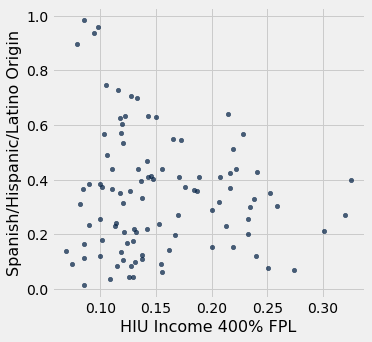

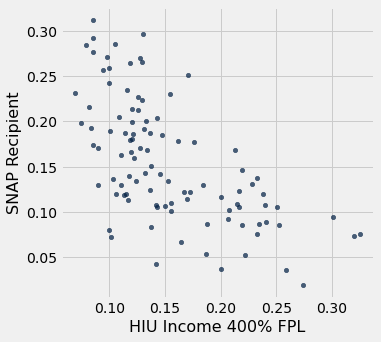

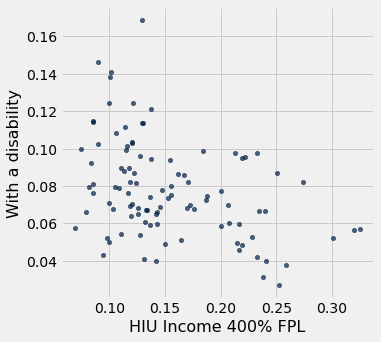

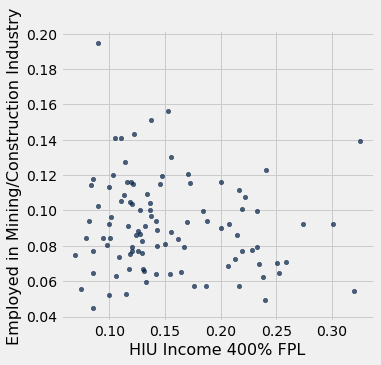

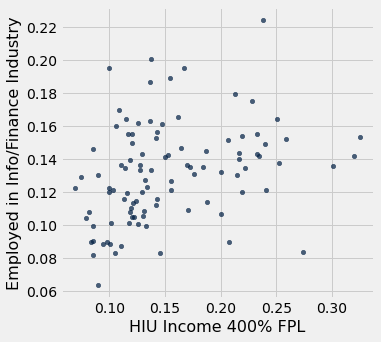

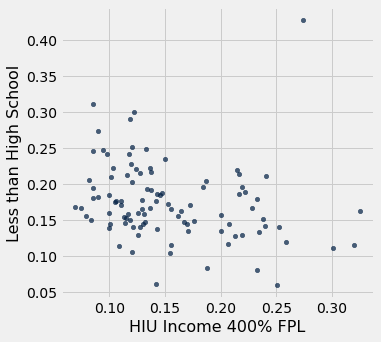

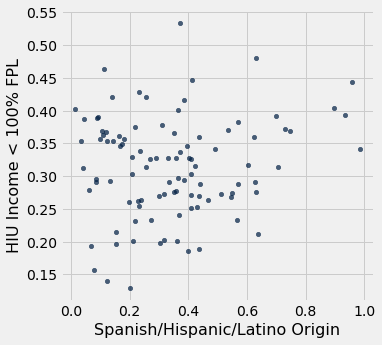

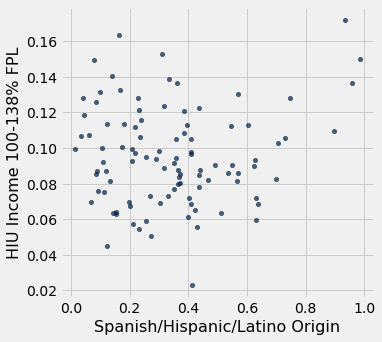

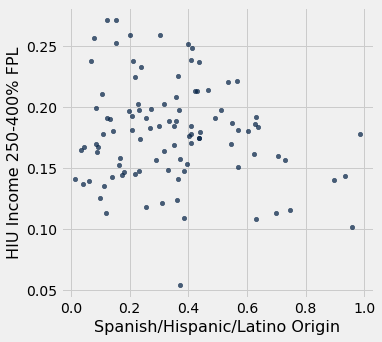

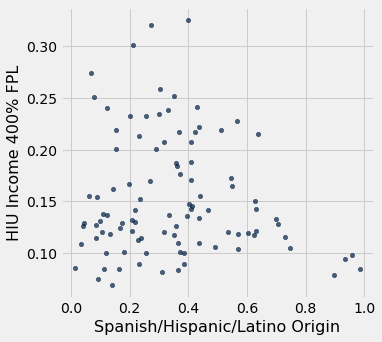

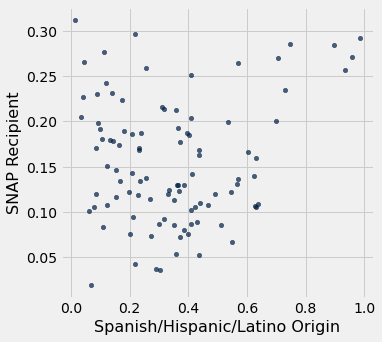

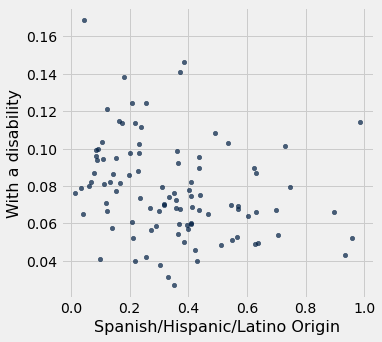

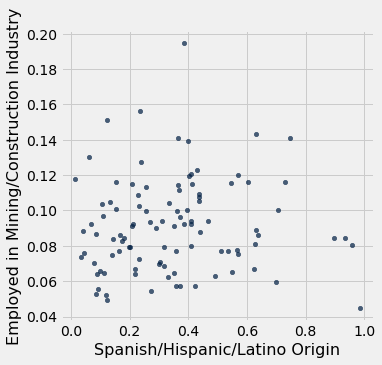

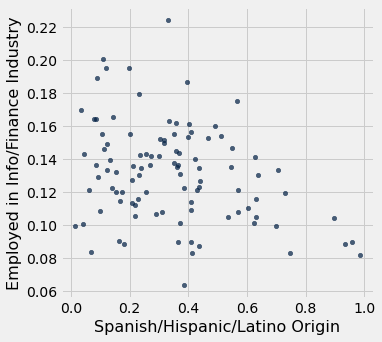

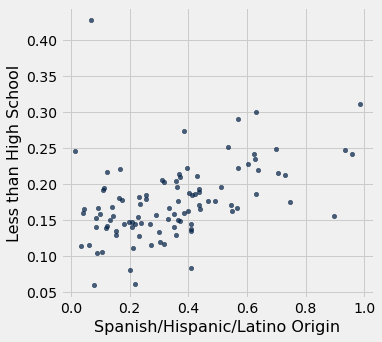

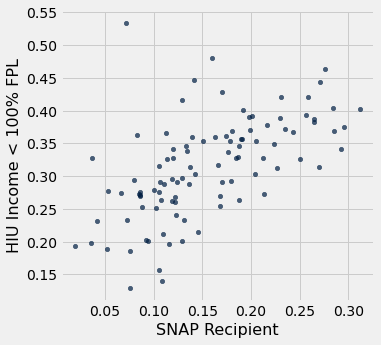

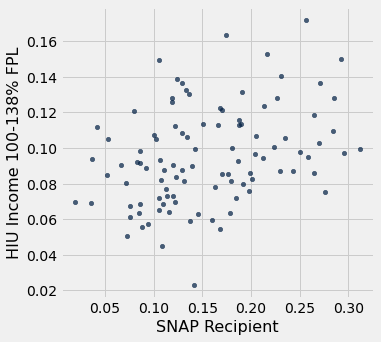

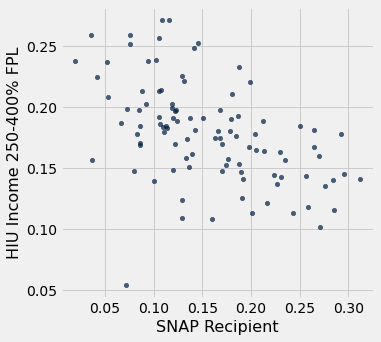

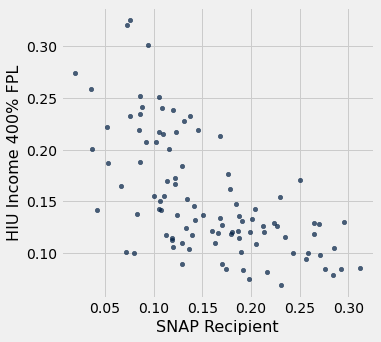

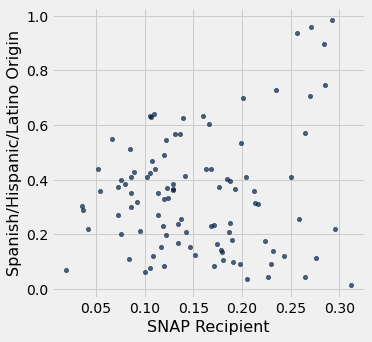

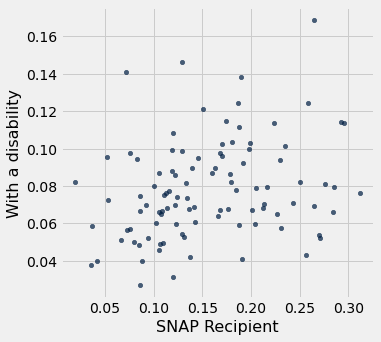

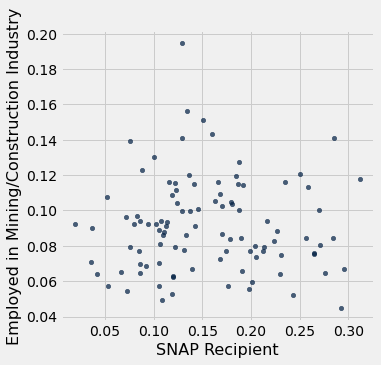

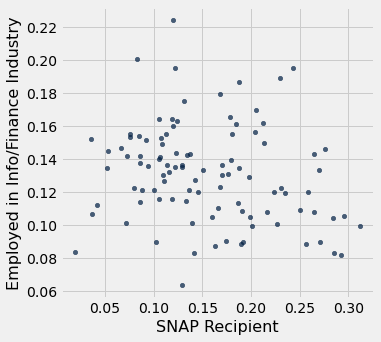

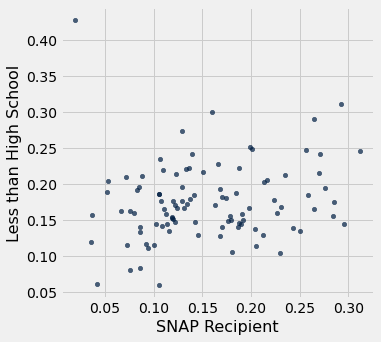

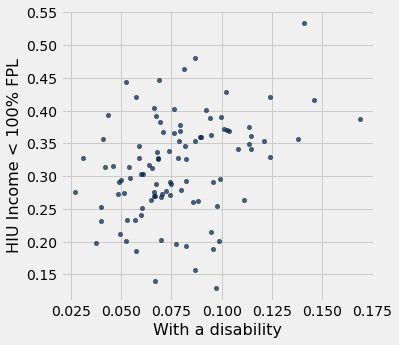

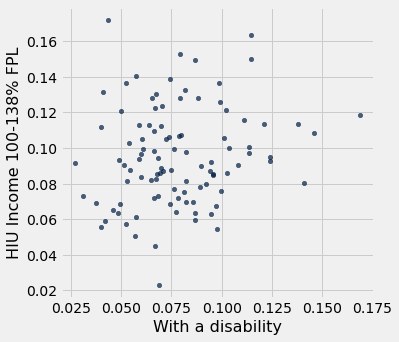

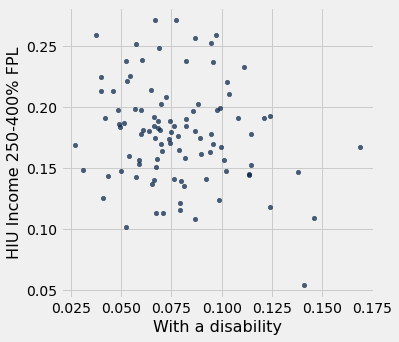

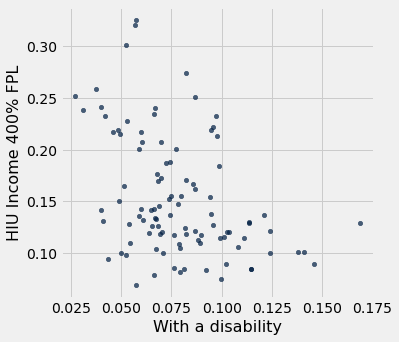

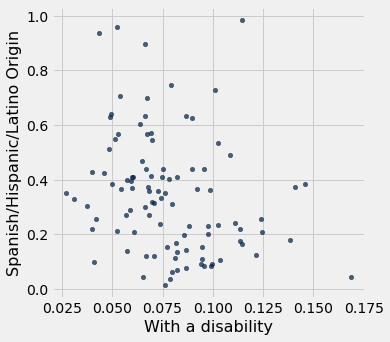

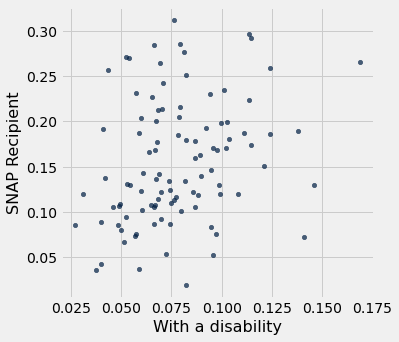

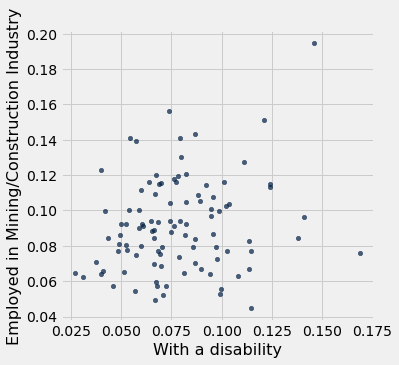

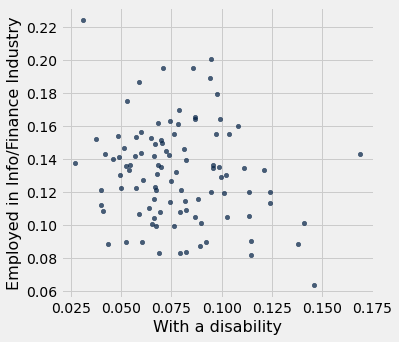

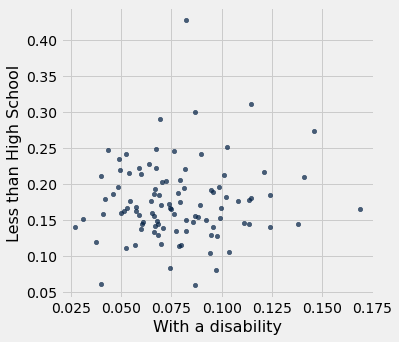

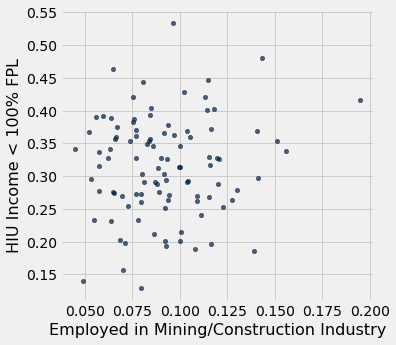

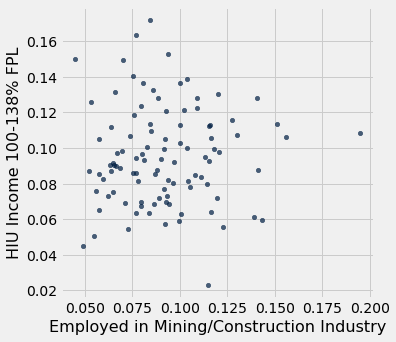

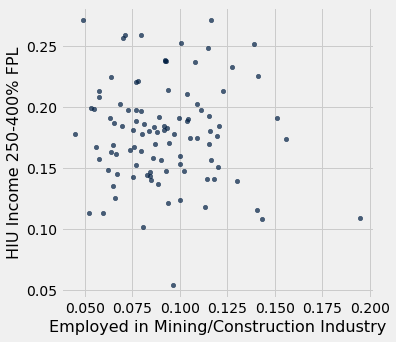

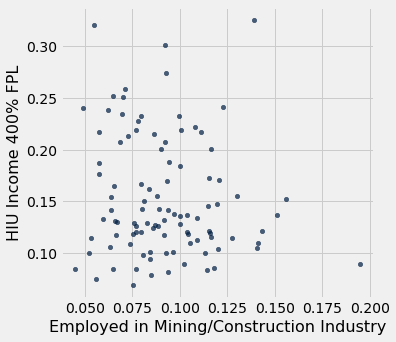

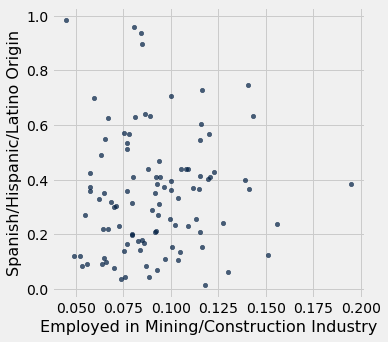

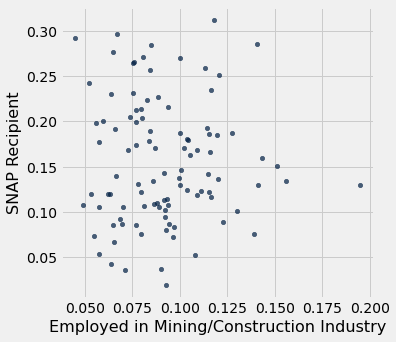

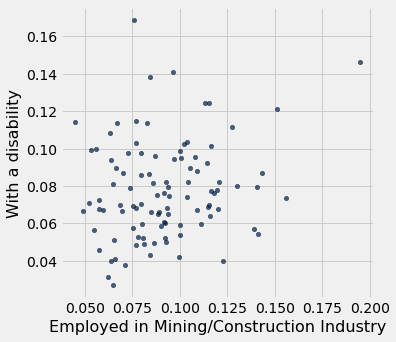

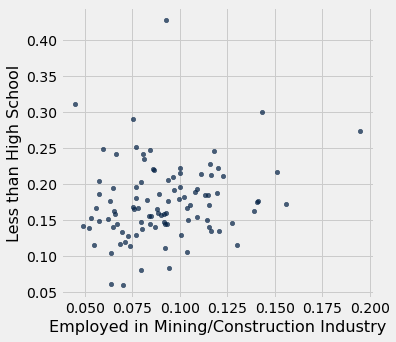

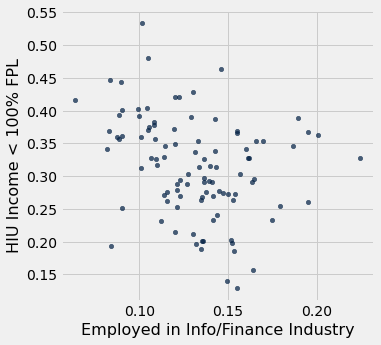

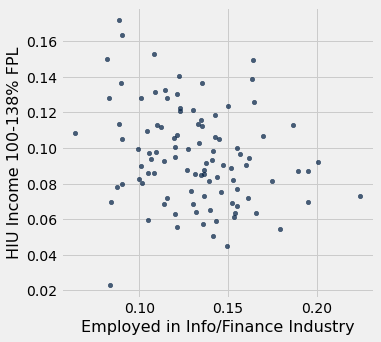

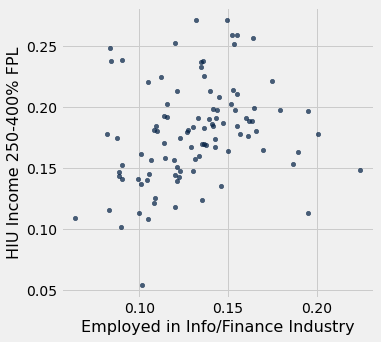

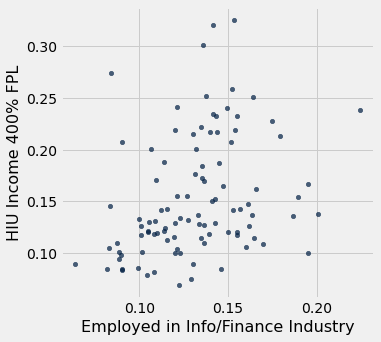

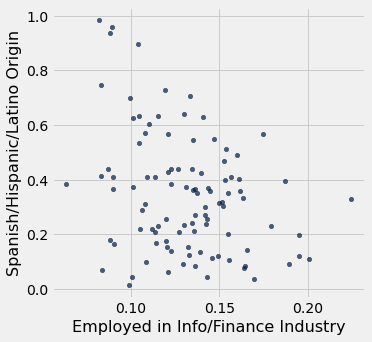

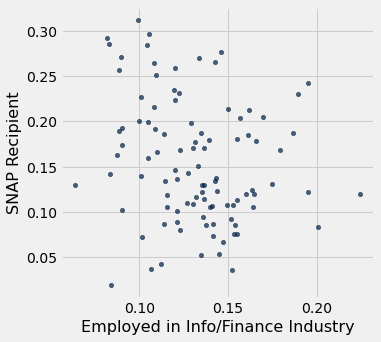

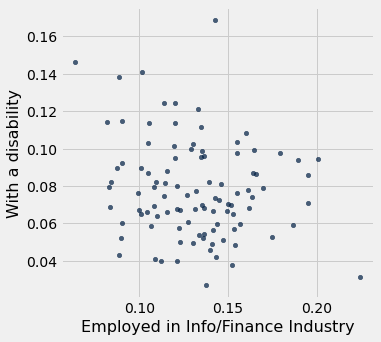

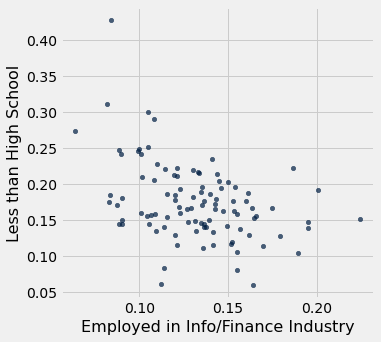

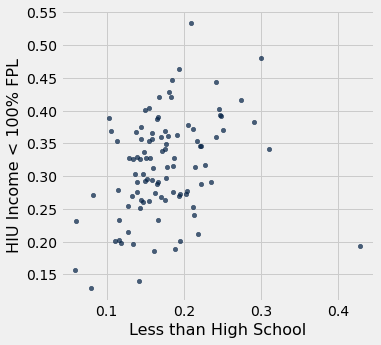

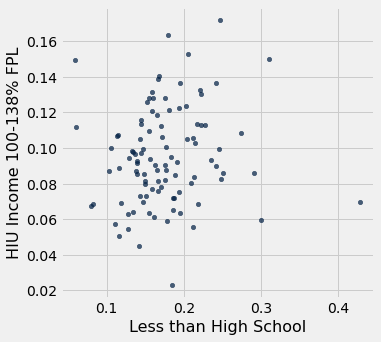

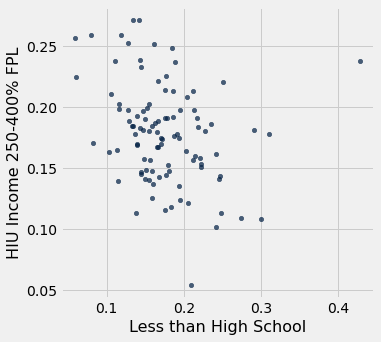

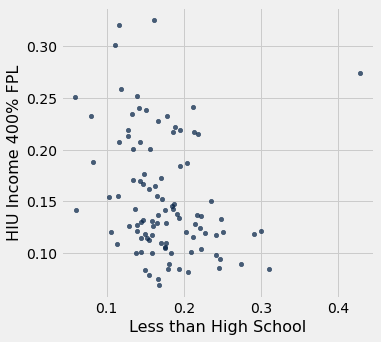

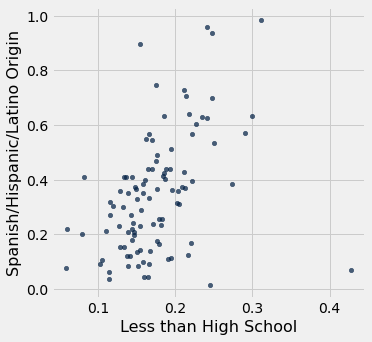

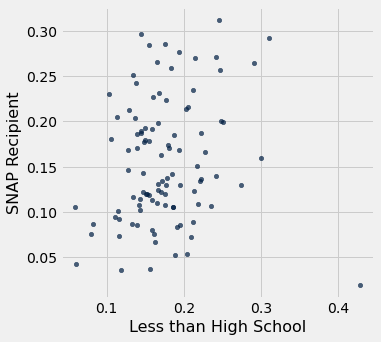

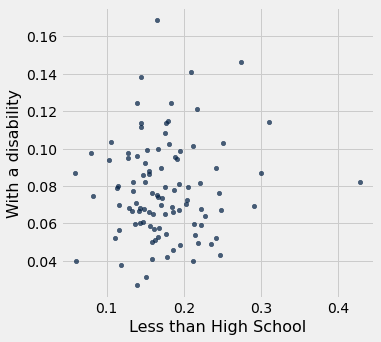

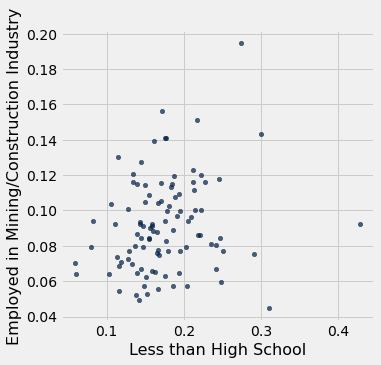

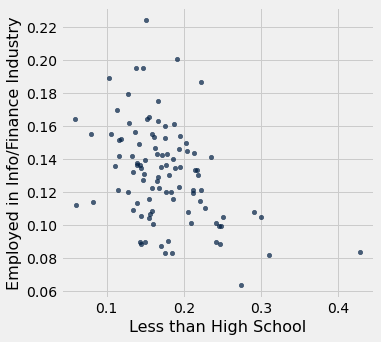

In [55]:
for factor in important_factors:
    for factor2 in important_factors:
        if ("Income" in factor) and ("Income" in factor2):
            continue
        if ("Industry" in factor) and ("Industry" in factor2):
            continue
        if factor == factor2:
            continue
        highest_total_in_percent.scatter(factor, factor2)